In [116]:
# clone the repo 'german traffic signs' from github in the colab env
# the '!' character allows to execute command line on colab 
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [117]:
# show the folder content
"""
signnames.csv : spreadsheet containing all traffic signs
test.p : pickel file(serialized data (Python compress steam format )  saved in the file, instea of a memory or disk), containing test dzta
train.p : pickle file, serialized data pickled	train dzta
valid.p : pickle file, containing validation dzta
"""
!ls /content/german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [118]:
# show file content
%pycat /content/german-traffic-signs/signnames.csv

# import pandas as pd
# df = pd.read_csv('/content/german-traffic-signs/signnames.csv')
# df.shape
# df.describe()


In [119]:

import numpy as np
# keras standard libs
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
# random functionalities
import random
# data serialization (save, load model ..)
import pickle
# load csv files
import pandas as pd
# opencv for computer techniques
import cv2
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
import matplotlib.pyplot as plt
# To plot graph inside the notebook console
%matplotlib inline


In [120]:
# seed random data
np.random.seed(0)

In [121]:
# TODO: Implement load the data here.
with open('/content/german-traffic-signs/train.p', 'rb') as f:
  # unpickling/deserializing the training data 
    train_data = pickle.load(f)
with open('/content/german-traffic-signs/valid.p', 'rb') as f:
    # unpickling/deserializing the validation data
    val_data = pickle.load(f)
# TODO: Load test data
with open('/content/german-traffic-signs/test.p', 'rb') as f:
# unpickling/deserializing the test data
    test_data = pickle.load(f)
    
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
 
#already 3 dimensional (3 : because our images are RBG)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [122]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32" 

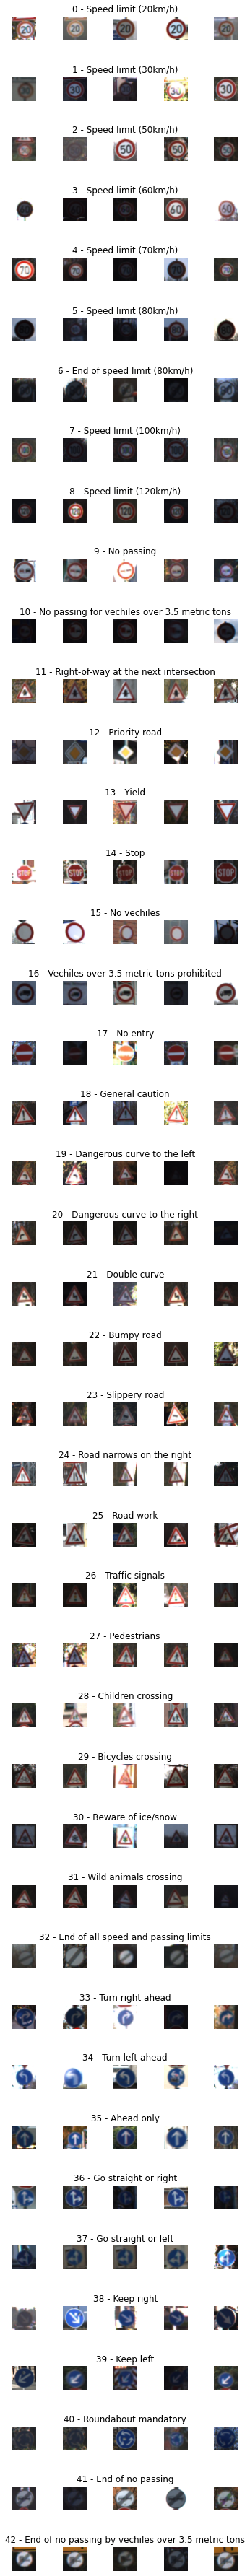

In [123]:
data = pd.read_csv('/content/german-traffic-signs/signnames.csv')
  
num_of_samples=[]
 
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      # iterow : 
      # filtering all the image with corespoding label j
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


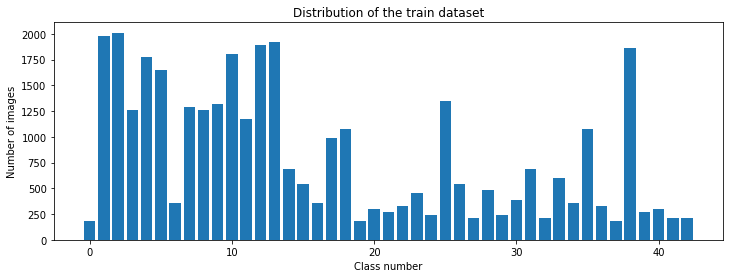

In [124]:
# dislay classes with associated input data
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


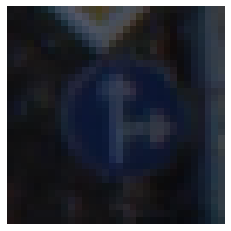

In [125]:
# Preprocessing RGB images with cv library  

plt.imshow(X_train[1000])
plt.axis("off")
# print the shape of the image to verify the format
print(X_train[1000].shape)
# print class label
print(y_train[1000])

In [126]:
"""TEST"""

# import requests
# from PIL import Image


# get image with PIllow lib
# url = ' https://cdn.futura-sciences.com/buildsv6/images/wide1920/0/f/0/0f0594906b_50153739_2-orchide-es.jpg'
# response = requests.get(url, stream=True)
# img = Image.open(response.raw)
# display original image
# plt.imshow(img)
# convert the original image into array of pixels to be processing 
# img = np.array(img)
# print(img)
# print(img.shape)
# plt.hist(img.ravel(),256,[0,256])
# plt.show()
# convert the selected image to grayscale
# img = grayscale(img)
# plt.imshow(img)
# print(img.shape)
# plt.hist(img.ravel(),256,[0,256])
# plt.show()


# plt.imshow(img,  cmap='gray', vmin=0, vmax=255)
# plt.axis("off")



'TEST'

(32, 32)


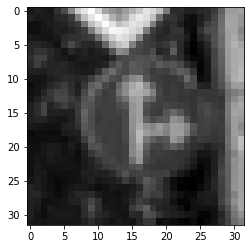

In [127]:
# convert RGB image to gray scale ie a single channet image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img,cmap=plt.get_cmap('gray'))
# plt.imshow(img)
print(img.shape)
# plt.axis("off")


(32, 32)


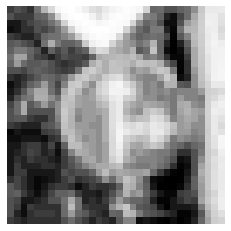

In [128]:
# increase the contrast or intensity of the image
# the gray intensity are now better disbuited in the image
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))
# plt.imshow(img)
plt.axis("off")
print(img.shape)


(34799, 32, 32)


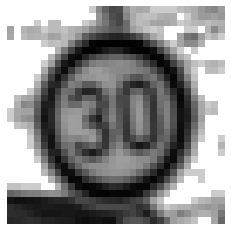

In [129]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
  
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))
 
#  plot random images
plt.imshow(X_train[random.randint(0, len(X_train) - 1)],cmap=plt.get_cmap('gray'))
plt.axis('off')
print(X_train.shape)

In [130]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

(20, 32, 32, 1)


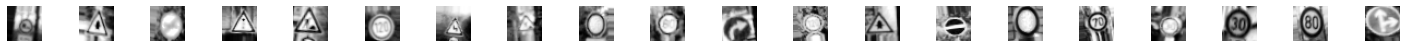

In [131]:
# adding more data to the model to increase more accuracy in case we have lesss amount of data
# Preparing data generation
from keras.preprocessing.image import ImageDataGenerator
"""
  5 effets to add on the image : 
    width_shift_range : range [0 - 1]
    height_shift_range: range [0 - 1]
    zoom_range : range [0 - 1]
    shear_range : range [0 - 1]
    rotation_rang : number of rotation in degree
""" 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
# performing statitically the transformation in the dataset
# this does 
datagen.fit(X_train)
# for X_batch, y_batch in
 
# create new image
# batch_size : 15 new imgs
batches = datagen.flow(X_train, y_train, batch_size = 20)
# store the image 
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 20, figsize=(20, 5))
fig.tight_layout()
 
for i in range(20):
    axs[i].imshow(X_batch[i].reshape(32, 32),  cmap = plt.get_cmap('gray') )
    axs[i].axis("off")
 
print(X_batch.shape)


In [132]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

# create model
 
def modified_model():
  model = Sequential()
  # 1 conv layer
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # 2 conv layer
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # flattening image to a single one
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  # dropout layers avoid outfitting
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  # low learning rate is important when dealing with too much dataset
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [133]:
# Model sumary before training
model = modified_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 480)              

In [134]:
# Training the model
# simple training
# history = model.fit(X_train, y_train, batch_size=400,
#                       
      epochs=10,
#                             validation_data=(X_val, y_val), verbose = 1, shuffle = 1)
# Training with generator  :
# adding more data to the model to increase more accuracy in case we have lesss amount of data
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=1000, epochs=10, validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
1000/1000 [==============================] - 13s 13ms/step - loss: 2.3425 - accuracy: 0.3545 - val_loss: 0.3338 - val_accuracy: 0.8973


Text(0.5, 0, 'epoch')

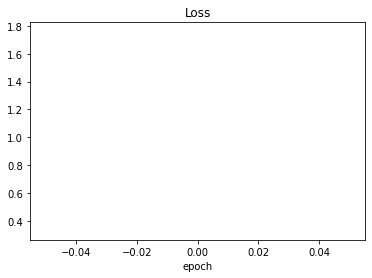

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

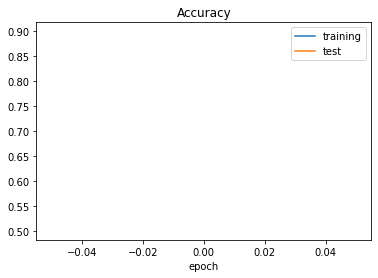

In [136]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [137]:
# TODO: Evaluate model on test data
# Returns the loss value & metrics values for the model in test mode.
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
 


Test score: 0.37421631813049316
Test accuracy: 0.8962786793708801


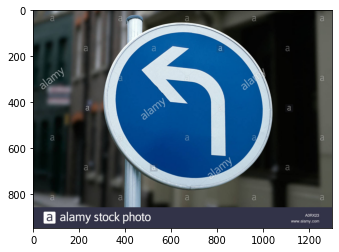

In [138]:
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
# url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
# url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
# url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
# url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


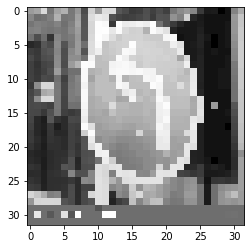

In [139]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)


In [140]:
 
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
